# 1
## a)
We have that matrix would be 

$$
\begin{bmatrix}
    0.2 & 0.7 & 0.1 \\
    0.2 & 0.5 & 0.3 \\
    0.2 & 0.4 & 0.4
\end{bmatrix}
$$

## b)

In [73]:
import numpy as np
transition_matrix = np.array([[0.2, 0.7, 0.1],
                               [0.2, 0.5, 0.3],
                               [0.2, 0.4, 0.4]])

initial = 0

state_sequence = [initial]

def get_next_state(current):
    next_state = np.random.choice(range(3), p= transition_matrix[current])
    return next_state

state_sequence.append(get_next_state(state_sequence[-1]))
print(state_sequence)

[0, 1]


We see that in single realization, our next state is 2. (0,1,2 represents state 1,2,3)

# 2
## a)

In [74]:
eigval, eigvec = np.linalg.eig(transition_matrix.T)
stationary_state = eigvec[:, 0]/np.sum(eigvec[:,0])

print(stationary_state)

[0.2        0.51111111 0.28888889]


In [75]:
stationary_state @ transition_matrix

array([0.2       , 0.51111111, 0.28888889])

we have that our stationary state is [0.2, 0.5111, 0.2889]

## b)

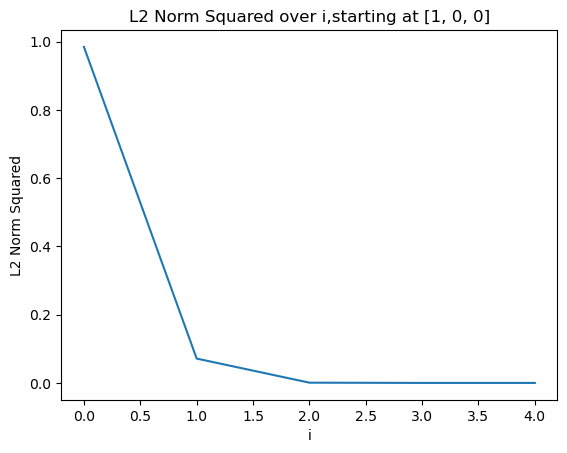

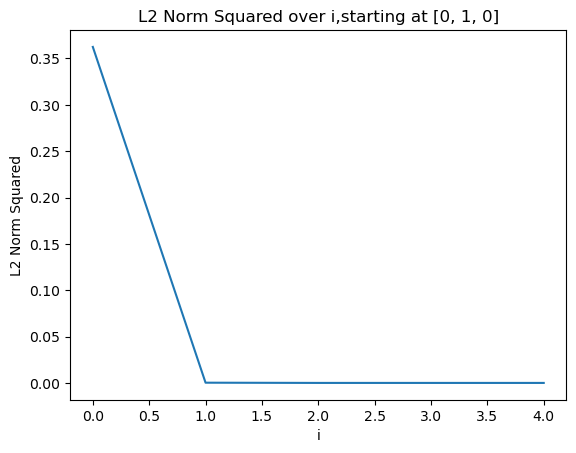

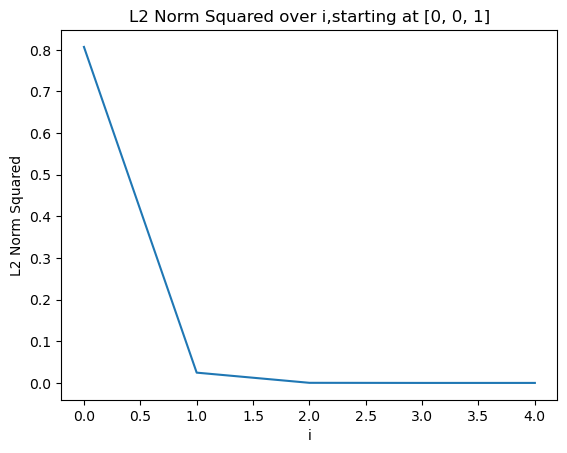

In [76]:
import matplotlib.pyplot as plt

def plot_diff(initial_state,i):
    eucli2 = []
    iter = []
    current = initial_state
    for j in range(i):
        next = current @ transition_matrix
        eucli2.append(np.sum((current-stationary_state)**2))
        iter.append(j)
        current = next
    
    plt.plot(iter, eucli2)
    plt.title(f"L2 Norm Squared over i,starting at {initial_state}")
    plt.xlabel('i')
    plt.ylabel('L2 Norm Squared')

    plt.show()

plot_diff([1,0,0],5)
plot_diff([0,1,0],5)
plot_diff([0,0,1],5)

We could see that for any initial condition, the $\pi_i$ quickly converges to our stationary state $\pi_\infty$

# 3
## a)

In [77]:
def get_arrival_time(initial):
    if initial == 2:
        print("already in absorbing state")
    
    step = 0
    current = initial
    
    while current !=2:
        current = get_next_state(current)
        step += 1
    
    return step

Text(0.5, 0.98, 'Histograms of 10000 simulation')

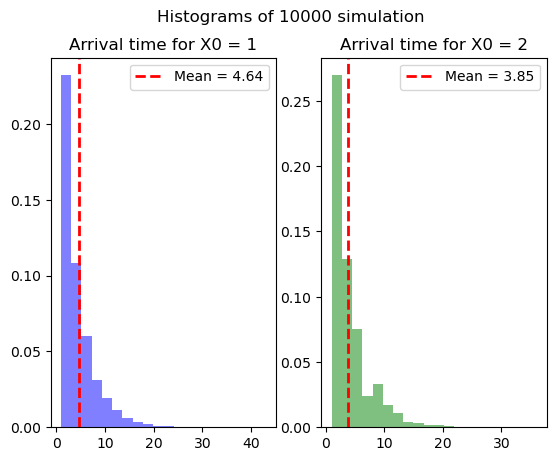

In [78]:
arr_from1 = []
arr_from2 = []

for i in range(10000):
    arr_from1.append(get_arrival_time(0))
    arr_from2.append(get_arrival_time(1))

fig, axes = plt.subplots(1, 2)

# Plot the first histogram and calculate the mean
axes[0].hist(arr_from1, bins=20, color='blue', alpha=0.5,density = True)
mean1 = np.mean(arr_from1)
axes[0].axvline(mean1, color='red', linestyle='dashed', linewidth=2, label=f'Mean = {mean1:.2f}')
axes[0].set_title('Arrival time for X0 = 1')
axes[0].legend()

# Plot the second histogram and calculate the mean
axes[1].hist(arr_from2, bins=20, color='green', alpha=0.5,density = True)
mean2 = np.mean(arr_from2)
axes[1].axvline(mean2, color='red', linestyle='dashed', linewidth=2, label=f'Mean = {mean2:.2f}')
axes[1].set_title('Arrival time for X0 = 2')
axes[1].legend()

# Add a common title for the whole figure
plt.suptitle('Histograms of 10000 simulation')

We could see that starting from node 2 goes to absorbing state faster.

## b)
We could calculate the $E[T_i]$ by solving the following linear system:


\begin{equation}
\begin{aligned}
  E[T_1] &= 1+ 0.2E[T_1]+0.7E[T_2]+0.1E[T_3] \\
  E[T_2] &= 1+ 0.2E[T_1]+0.5E[T_2]+0.3E[T_3] \\
  E[T_3] &= 0
\end{aligned}
\end{equation}


Solving it by hand, we have


\begin{equation}
\begin{aligned}
  E[T_1] &= 4.615 \\
  E[T_2] &= 3.846 \\
  E[T_3] &= 0
\end{aligned}
\end{equation}




Pretty close to what we have in a)